In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
con = sqlite3.connect('../data/database.db')
df = pd.read_sql_query('SELECT * FROM transDev;', con, index_col='id')
df['date'] = pd.to_datetime(df['date'], format='%y%m%d')
df.head()

,accountId,date,type,operation,amount,balance,k_symbol,bank,account
id,,,,,,,,,
1548749,5270,1993-01-13,credit,credit in cash,800.0,800.0,,,
1548750,5270,1993-01-14,credit,collection from another bank,44749.0,45549.0,,IJ,80269753
3393738,11265,1993-01-14,credit,credit in cash,1000.0,1000.0,,,
3122924,10364,1993-01-17,credit,credit in cash,1100.0,1100.0,,,
1121963,3834,1993-01-19,credit,credit in cash,700.0,700.0,,,


In [3]:
print(df['type'].unique())
print(df['operation'].unique())

['credit' 'withdrawal' 'withdrawal in cash']
['credit in cash' 'collection from another bank' '' 'withdrawal in cash'
 'remittance to another bank' 'credit card withdrawal']


Text(0.5, 0, 'frequency of each type')

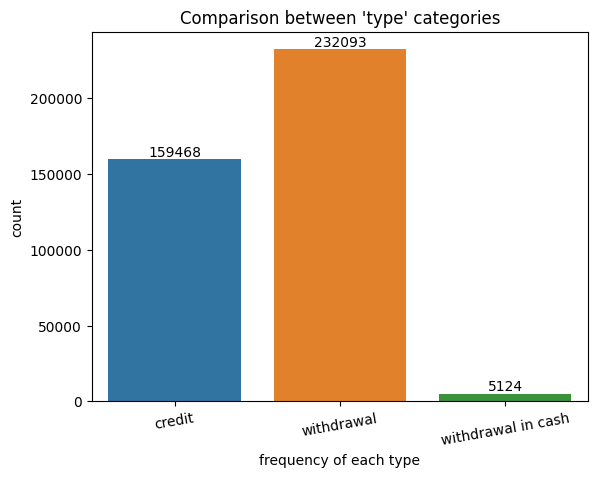

In [4]:
ax = sns.countplot(df, x='type')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=10)
plt.title("Comparison between 'type' categories")
plt.xlabel('frequency of each type')

Text(0.5, 0, 'frequency of each operation')

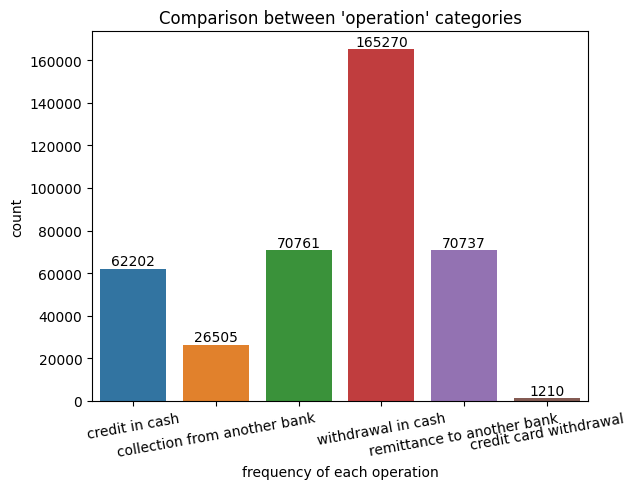

In [5]:
ax = sns.countplot(df, x='operation')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=10)
plt.title("Comparison between 'operation' categories")
plt.xlabel('frequency of each operation')

Text(0.5, 0, 'year')

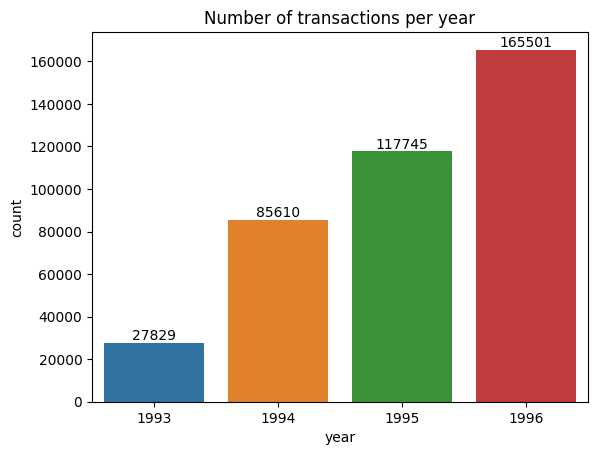

In [5]:
ax = sns.countplot(df, x=df['date'].dt.strftime('%Y'))
ax.bar_label(ax.containers[0])
plt.title('Number of transactions per year')
plt.xlabel('year')

Text(0.5, 1.0, 'Top 10 accounts with most transactions')

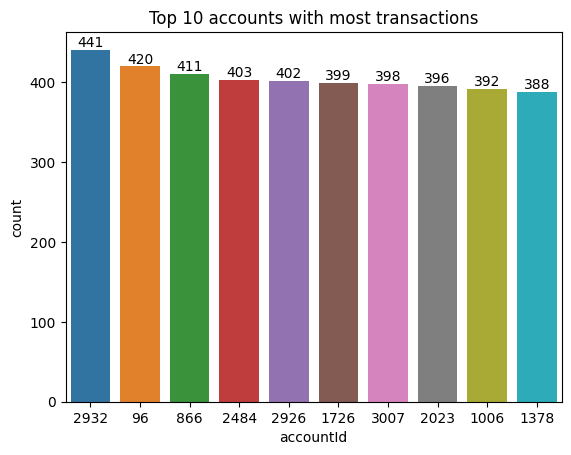

In [7]:
ax = sns.countplot(df, x='accountId', order=df['accountId'].value_counts().iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.title('Top 10 accounts with most transactions')

Text(0.5, 1.0, 'Top 10 banks with most transactions')

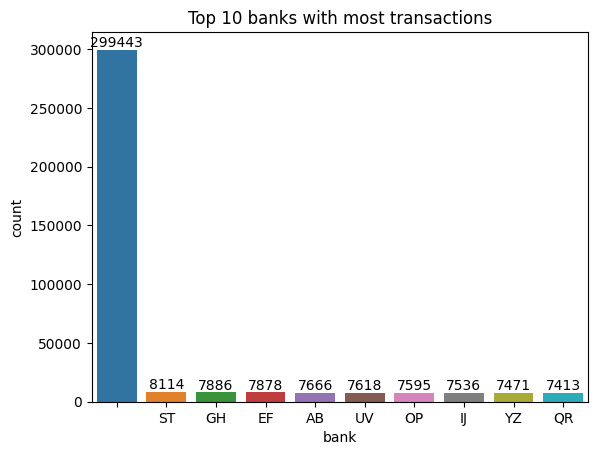

In [8]:
ax = sns.countplot(df, x='bank', order=df['bank'].value_counts().iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.title('Top 10 banks with most transactions')